## Ordinal Regression using statsmodels
### https://analyticsindiamag.com/a-complete-tutorial-on-ordinal-regression-in-python

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [233]:
import warnings
warnings.filterwarnings('ignore')

In [234]:
# Data Import
df = pd.read_csv('../../../data/diamonds.csv')
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [235]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

We observe that data is not balanced, we need to balalnce the data

In [236]:
# calculate the volume of the diamonds
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x','y','z'],axis=1,inplace=True)
x_sm = df[['carat','depth', 'table','price','volume']]
y_sm = df[['cut']]

## Vsualize Data

Text(0.5, 1.0, 'Distribution by Volume')

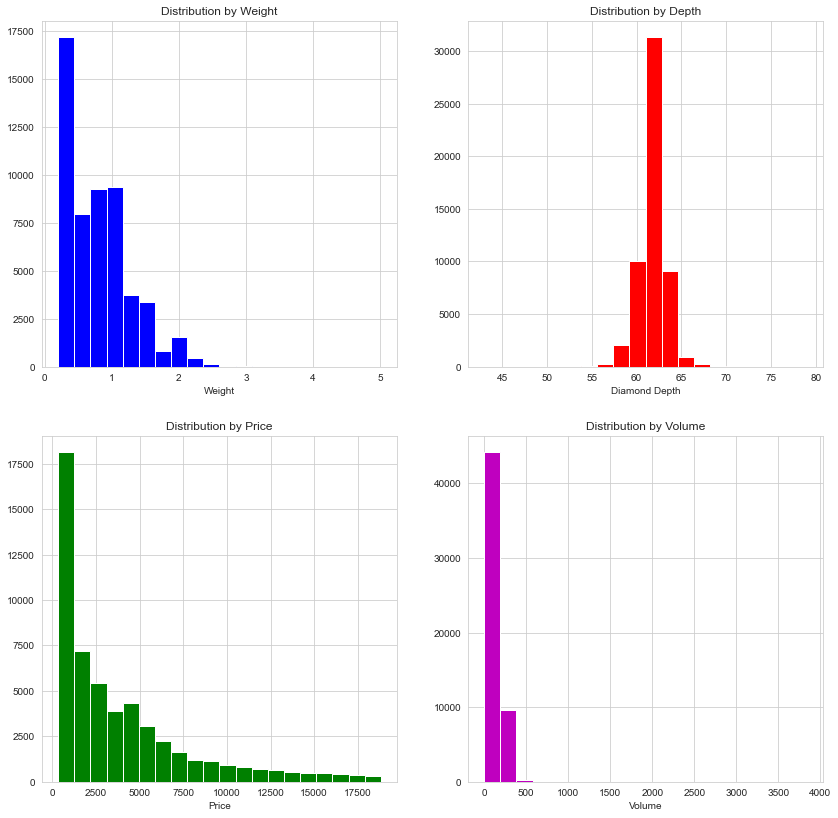

In [237]:
plt.figure(figsize=[14,14])

plt.subplot(221)
plt.hist(df['carat'],bins=20,color='b')
plt.xlabel('Weight')
plt.title('Distribution by Weight')

plt.subplot(222)
plt.hist(df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')

plt.subplot(223)
plt.hist(df['price'],bins=20,color='g')
plt.xlabel('Price')
plt.title('Distribution by Price')

plt.subplot(224)
plt.hist(df['volume'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

## Data preprocessing

In [238]:
# convert the target variable into a categorical ordered form
cut_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)
y_sm["cut"] = y_sm["cut"].astype(cut_type)
y_sm['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

Here we can see that now the values under the cut variable are in a categorical ordered form

## Ordered probit model

In [239]:
# Define ordered probit model taking the cut variable as our target and volume, price, and carat as independent variables.
mod_probit = OrderedModel(y_sm['cut'],
                        x_sm[['carat','depth', 'table','price','volume']],
                        distr='probit')

res_probit = mod_probit.fit(method='bfgs')
res_probit.summary()

         Current function value: 1.318315
         Iterations: 42
         Function evaluations: 50
         Gradient evaluations: 50


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -71110.
Model:                   OrderedModel   AIC:                         1.422e+05
Method:            Maximum Likelihood   BIC:                         1.423e+05
Date:                Wed, 05 Apr 2023                                         
Time:                        14:25:26                                         
No. Observations:               53940                                         
Df Residuals:                   53931                                         
Df Model:                           9                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
carat                -0.6476      0.103     -6.304      0.000      -0.849      -0.446
depth                -0.1765      0.004    -49.553      0.000      -0.183      -0.169
table                 0.0787      0.002     34.411      0.000       0.074       0.083
price              3.439e-05   3.07e-06     11.192      0.000    2.84e-05    4.04e-05
volume                0.0029      0.001      4.695      0.000       0.002       0.004
Fair/Good            -8.3549      0.292    -28.619      0.000      -8.927      -7.783
Good/Ideal           -0.2933      0.014    -21.035      0.000      -0.321      -0.266
Ideal/Very Good       0.2406      0.006     41.377      0.000       0.229       0.252
Very Good/Premium    -0.4202      0.008    -50.893      0.000      -0.436      -0.404
=====================================================================================
"""

In [240]:
# Prediction
predicted = res_probit.model.predict(res_probit.params, exog=x_sm[['carat','depth', 'table','price','volume']])
predicted

array([[3.57073330e-02, 1.09544137e-01, 4.39866258e-01, 2.23247586e-01,
        1.91634687e-01],
       [4.98293005e-03, 2.85524953e-02, 2.54485222e-01, 2.50897341e-01,
        4.61082011e-01],
       [3.35787545e-04, 3.62827688e-03, 7.93541324e-02, 1.50537369e-01,
        7.66144434e-01],
       ...,
       [2.45156082e-02, 8.62422822e-02, 4.08987682e-01, 2.40284616e-01,
        2.39969811e-01],
       [1.77885287e-02, 6.97744284e-02, 3.79007622e-01, 2.50104096e-01,
        2.83325325e-01],
       [4.66761464e-02, 1.28950583e-01, 4.57392953e-01, 2.07536507e-01,
        1.59443811e-01]])

In [241]:
y_pred = predicted.argmax(axis=1)
y_pred = pd.DataFrame(y_pred,columns=['y'])
cut_map = {0:'Fair', 1:'Good', 2:'Ideal', 3:'Very Good', 4:'Premium'}
y_pred['y'] = y_pred['y'].map(cut_map)

In [242]:
y_pred

,y
0,Ideal
1,Premium
2,Premium
3,Ideal
4,Ideal
...,...
53935,Ideal
53936,Ideal
53937,Ideal
53938,Ideal


## Model Testing

In [243]:
print(f'The model accuracy is: {np.round(accuracy_score(y_sm.cut, y_pred), decimals=3)*100}%')

The model accuracy is: 47.3%


In [244]:
print(f'The model f1 score is: {np.round(f1_score(y_sm.cut, y_pred, average="""weighted"""), decimals=3)*100}%')

The model f1 score is: 35.5%


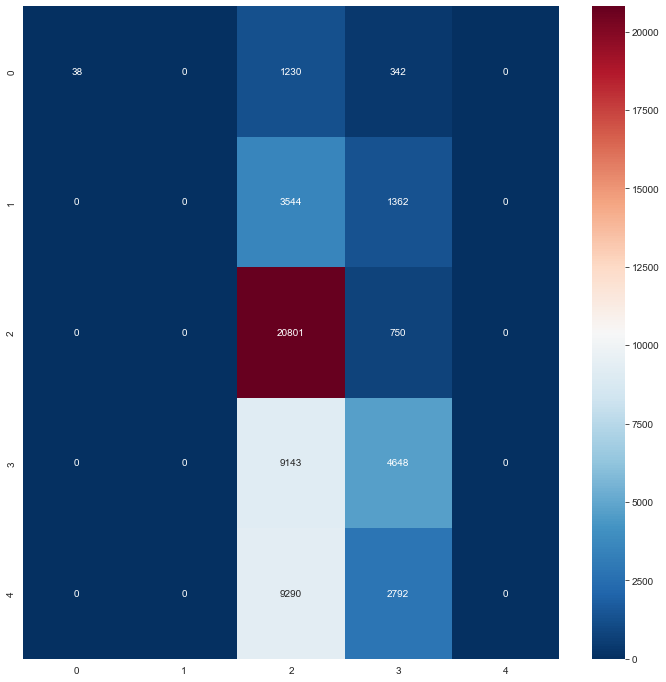

In [245]:
cm = confusion_matrix(y_sm.cut, y_pred)
plt.figure(figsize=(12, 12))
cmap = sns.color_palette("Oranges",12)
sns.heatmap(data=cm, cmap="RdBu_r", fmt='g', annot=True)
plt.show()

## Ordered logit regression

In [246]:
# Define ordered probit model taking the cut variable as our target and volume, price, and carat as independent variables.
mod_logit = OrderedModel(y_sm['cut'],
                          x_sm[['carat','depth', 'table','price','volume']],
                          distr='logit')

res_logit = mod_logit.fit(method='bfgs')
res_logit.summary()

Optimization terminated successfully.
         Current function value: 1.296608
         Iterations: 52
         Function evaluations: 58
         Gradient evaluations: 58


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -69939.
Model:                   OrderedModel   AIC:                         1.399e+05
Method:            Maximum Likelihood   BIC:                         1.400e+05
Date:                Wed, 05 Apr 2023                                         
Time:                        14:25:40                                         
No. Observations:               53940                                         
Df Residuals:                   53931                                         
Df Model:                           9                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
carat                -0.8274      0.225     -3.671      0.000      -1.269      -0.386
depth                -0.3667      0.007    -50.287      0.000      -0.381      -0.352
table                 0.2330      0.004     52.495      0.000       0.224       0.242
price              3.591e-05   5.39e-06      6.665      0.000    2.54e-05    4.65e-05
volume                0.0044      0.001      3.202      0.001       0.002       0.007
Fair/Good           -13.0078      0.572    -22.732      0.000     -14.129     -11.886
Good/Ideal            0.4474      0.015     30.322      0.000       0.419       0.476
Ideal/Very Good       0.8119      0.006    130.410      0.000       0.800       0.824
Very Good/Premium     0.1400      0.008     16.549      0.000       0.123       0.157
=====================================================================================
"""

In [247]:
# Prediction
predicted = res_logit.model.predict(res_logit.params, exog=x_sm[['carat','depth', 'table','price','volume']])
predicted

array([[3.70152171e-02, 1.18179156e-01, 4.80725718e-01, 2.10650533e-01,
        1.53429376e-01],
       [5.06398772e-03, 1.86835150e-02, 1.64091080e-01, 2.34333670e-01,
        5.77827748e-01],
       [6.91964879e-04, 2.60647147e-03, 2.72068477e-02, 5.99061702e-02,
        9.09588546e-01],
       ...,
       [1.83313784e-02, 6.36023194e-02, 3.77100465e-01, 2.69267360e-01,
        2.71698477e-01],
       [1.53973679e-02, 5.41436467e-02, 3.45871716e-01, 2.76402670e-01,
        3.08184600e-01],
       [4.57063705e-02, 1.40560286e-01, 4.98912004e-01, 1.87841248e-01,
        1.26980092e-01]])

In [248]:
y_pred = predicted.argmax(axis=1)
y_pred = pd.DataFrame(y_pred,columns=['y'])
cut_map = {0:'Fair', 1:'Good', 2:'Ideal', 3:'Very Good', 4:'Premium'}
y_pred['y'] = y_pred['y'].map(cut_map)

In [249]:
y_pred

,y
0,Ideal
1,Premium
2,Premium
3,Ideal
4,Ideal
...,...
53935,Ideal
53936,Ideal
53937,Ideal
53938,Ideal


## Model Testing

In [250]:
print(f'The model accuracy is: {np.round(accuracy_score(y_sm.cut, y_pred), decimals=3)*100}%')

The model accuracy is: 50.7%


In [251]:
print(f'The model f1 score is: {np.round(f1_score(y_sm.cut, y_pred, average="""weighted"""), decimals=3)*100}%')

The model f1 score is: 39.300000000000004%


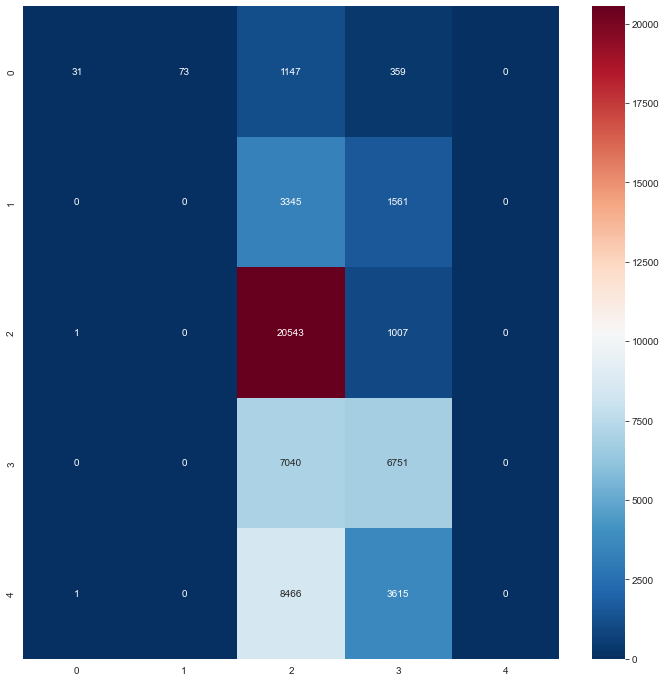

In [252]:
cm = confusion_matrix(y_sm.cut, y_pred)
plt.figure(figsize=(12, 12))
cmap = sns.color_palette("Oranges",12)
sns.heatmap(data=cm, cmap="RdBu_r", fmt='g', annot=True)
plt.show()